In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('Data.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
df.shape

(731, 16)

In [47]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
## checking for duplicate
len(df[df.duplicated()])

0

In [50]:
##creating a variable to store list of feature names to drop
drop_list=['instant','dteday']

for i in df.columns:
    if i in drop_list:
        df.drop(i,axis=1,inplace=True)

df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [52]:
df['weathersit']= df['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
df['season']= df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df['mnth']= df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']= df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Spring,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


/tmp/ipykernel_1066/4195021081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['cnt'],ax=ax[0],palette='Purples')
/tmp/ipykernel_1066/4195021081.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'],ax=ax[1],color='purple')


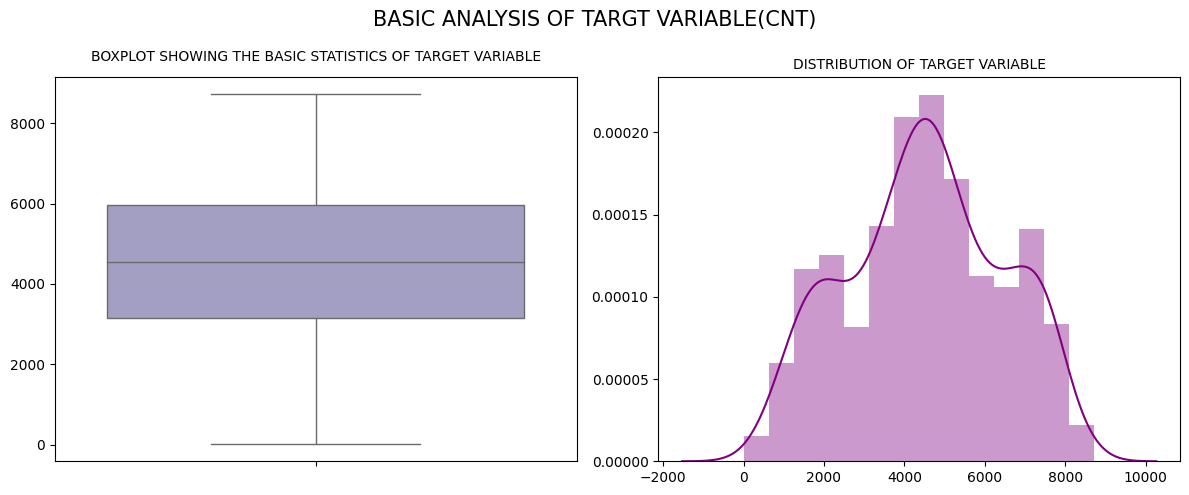

In [53]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Basic analysis of targt variable(cnt)'.upper(),fontsize=15)

sns.boxplot(y=df['cnt'],ax=ax[0],palette='Purples')
ax[0].set_title('boxplot showing the basic statistics of target variable'.upper(),fontsize=10,fontweight= 20, y=1.02)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.distplot(df['cnt'],ax=ax[1],color='purple')
ax[1].set_title('Distribution of target variable'.upper(),fontsize=10,fontweight= 20, y=1)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

In [54]:
## creating a list of continuous independent variables for analysis
cont_var=[i for i in df.select_dtypes(exclude='object').columns if df[i].nunique()>2 and i != 'cnt']

/tmp/ipykernel_1066/4206326710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[cont_var[i]],ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/4206326710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[cont_var[i]],ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/4206326710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[cont_var[i]],ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/4206326710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

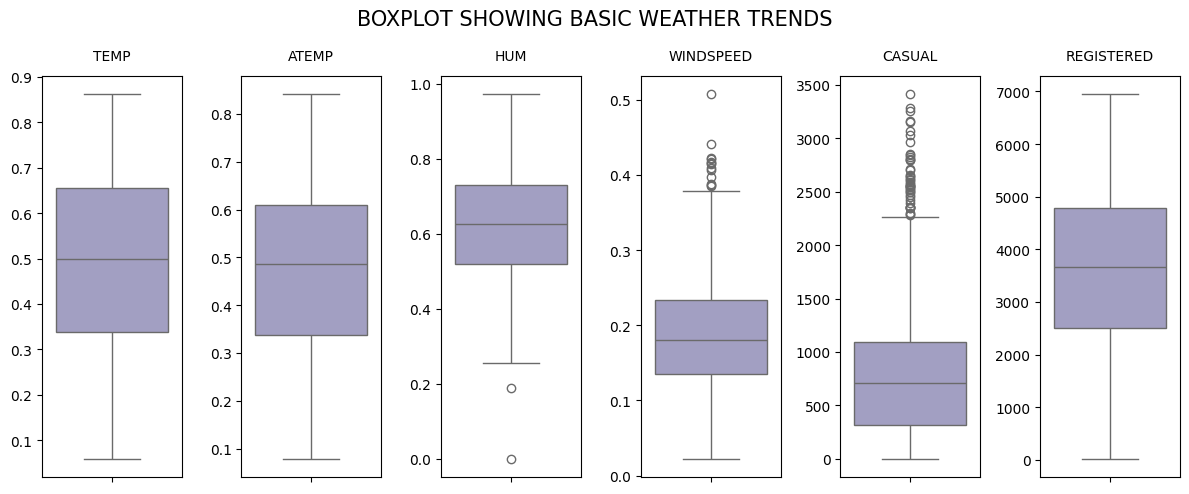

In [55]:
fig,ax=plt.subplots(1,len(cont_var),figsize=(12,5))

plt.suptitle('boxplot showing basic weather trends'.upper(),fontsize=15)

for i in range(len(cont_var)):
    sns.boxplot(y=df[cont_var[i]],ax=ax[i],palette='Purples')
    ax[i].set_title(f'{cont_var[i].upper()}',fontsize=10,fontweight= 20, y=1.02)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1066/3505341078.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cont_var[i]],ax=ax[i],color='purple')
/tmp/ipykernel_1066/3505341078.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cont_var[i]],ax=ax[i],color='purple')
/tmp/ipykernel_1066/3505341078.py:6: UserWarning

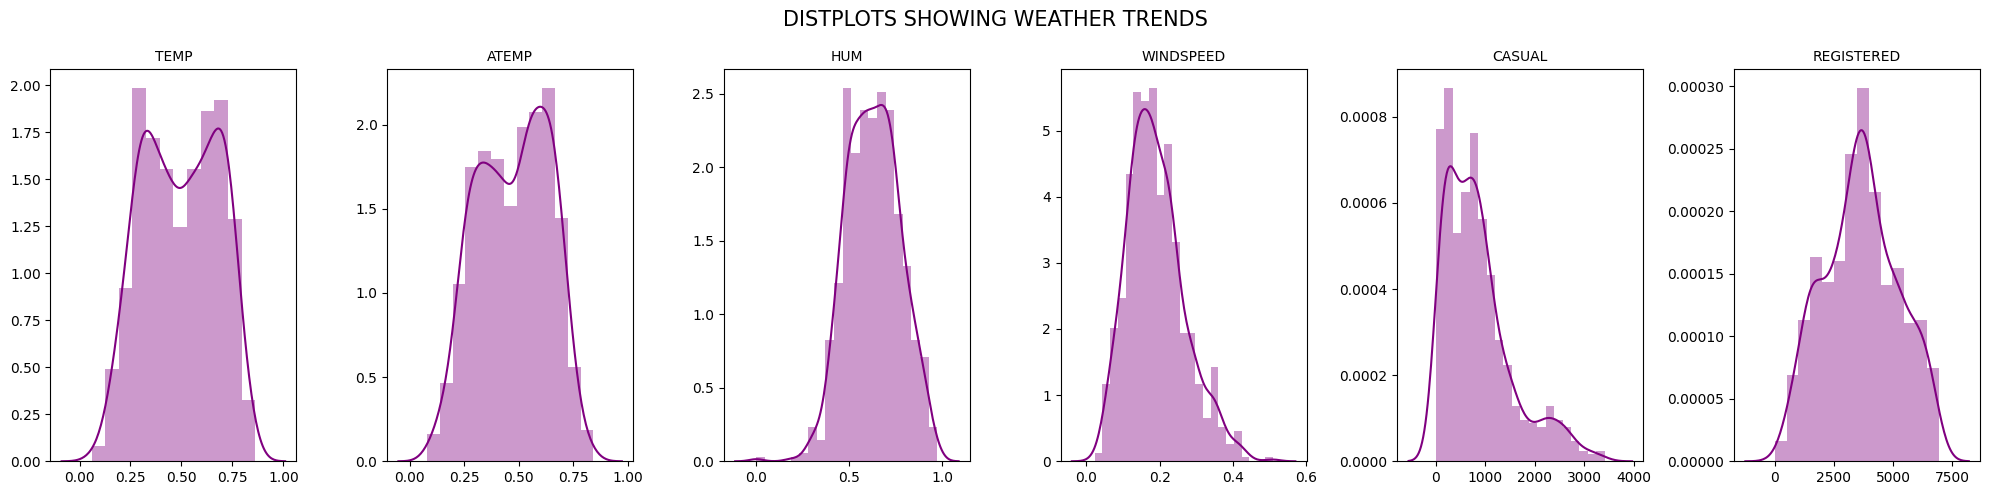

In [56]:
fig,ax=plt.subplots(1,len(cont_var),figsize=(20,5))

plt.suptitle('Distplots showing weather trends'.upper(),fontsize=15)

for i in range(len(cont_var)):
    sns.distplot(df[cont_var[i]],ax=ax[i],color='purple')
    ax[i].set_title(f'{cont_var[i].upper()}',fontsize=10,fontweight= 20)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1066/2455938482.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_var[k]], palette='Purples', ax=ax[i,j])
/tmp/ipykernel_1066/2455938482.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_var[k]], palette='Purples', ax=ax[i,j])
/tmp/ipykernel_1066/2455938482.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_var[k]], palette='Purples', ax=ax[i,j])
/tmp/ipykernel_1066/2455938482.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

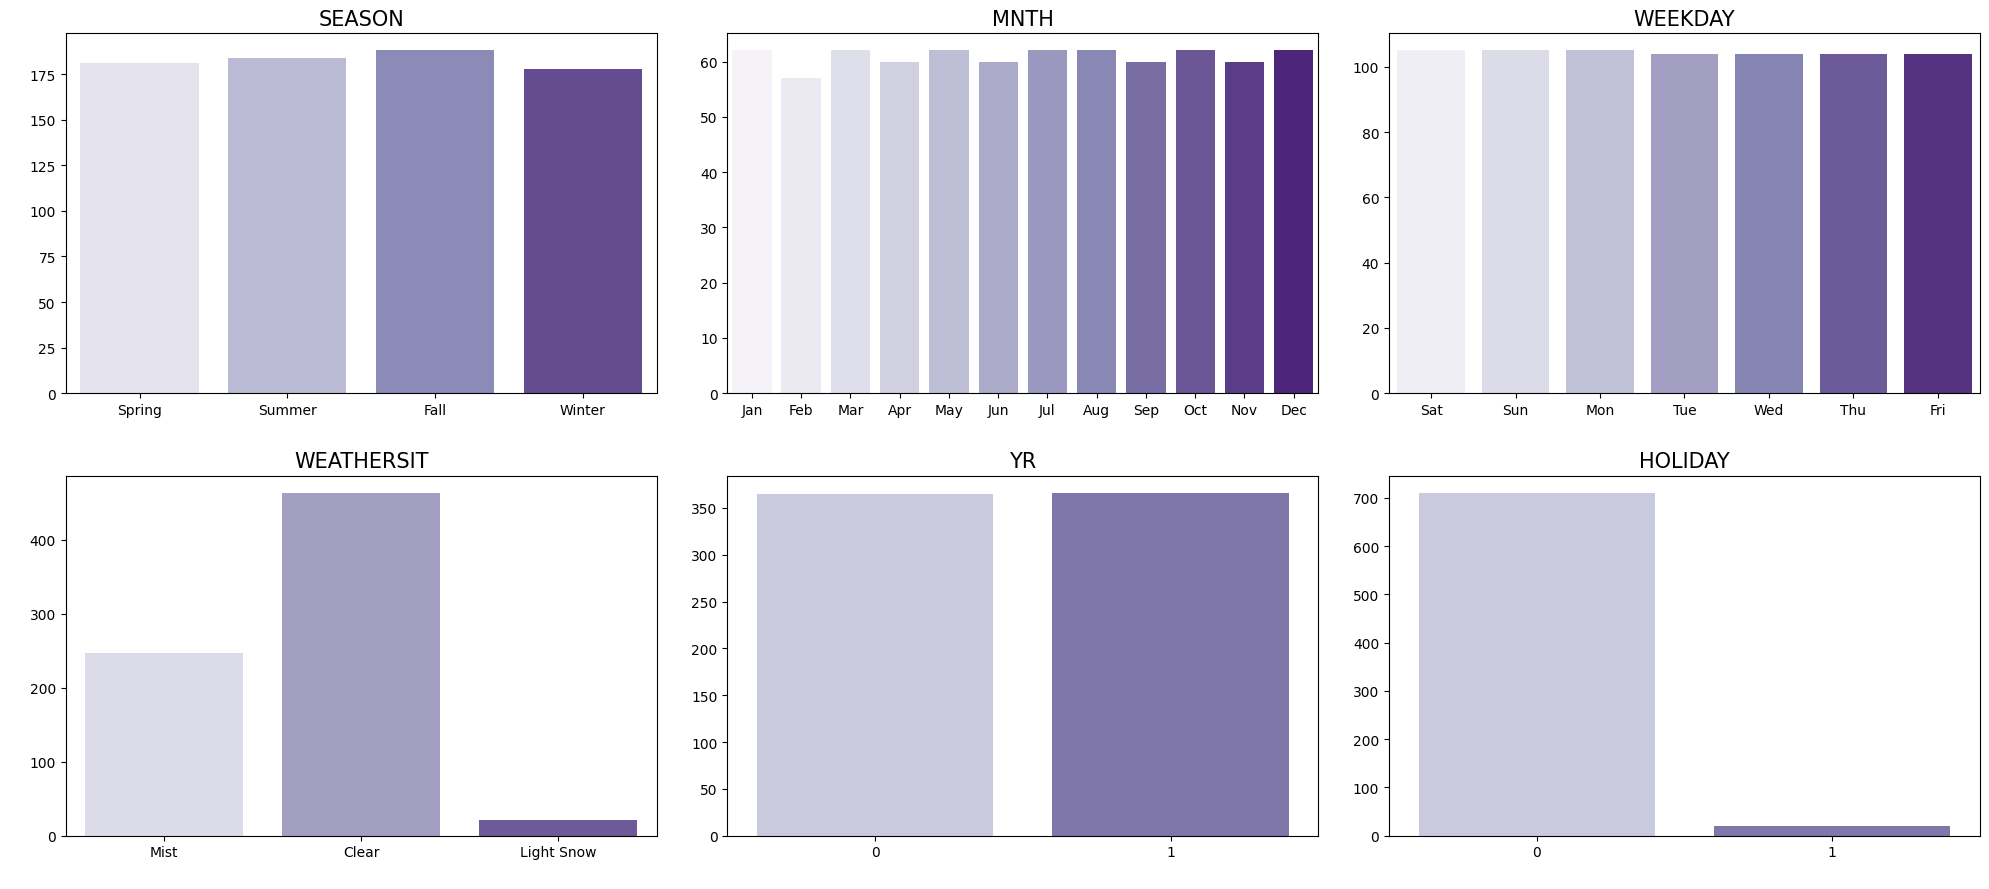

In [57]:
## creating a list of categorical independent variables for analysis
cat_var=[i for i in df.select_dtypes(include='object').columns]
cat_var.extend([i for i in df.columns if df[i].nunique()==2])

fig, ax = plt.subplots(2, len(cat_var)//2,figsize=(20,9))

k=0
for i in range(2):
    for j in range(len(cat_var)//2):
        sns.countplot(x=df[cat_var[k]], palette='Purples', ax=ax[i,j])
        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize=15, fontweight=20)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        k+=1

plt.tight_layout()
plt.show()

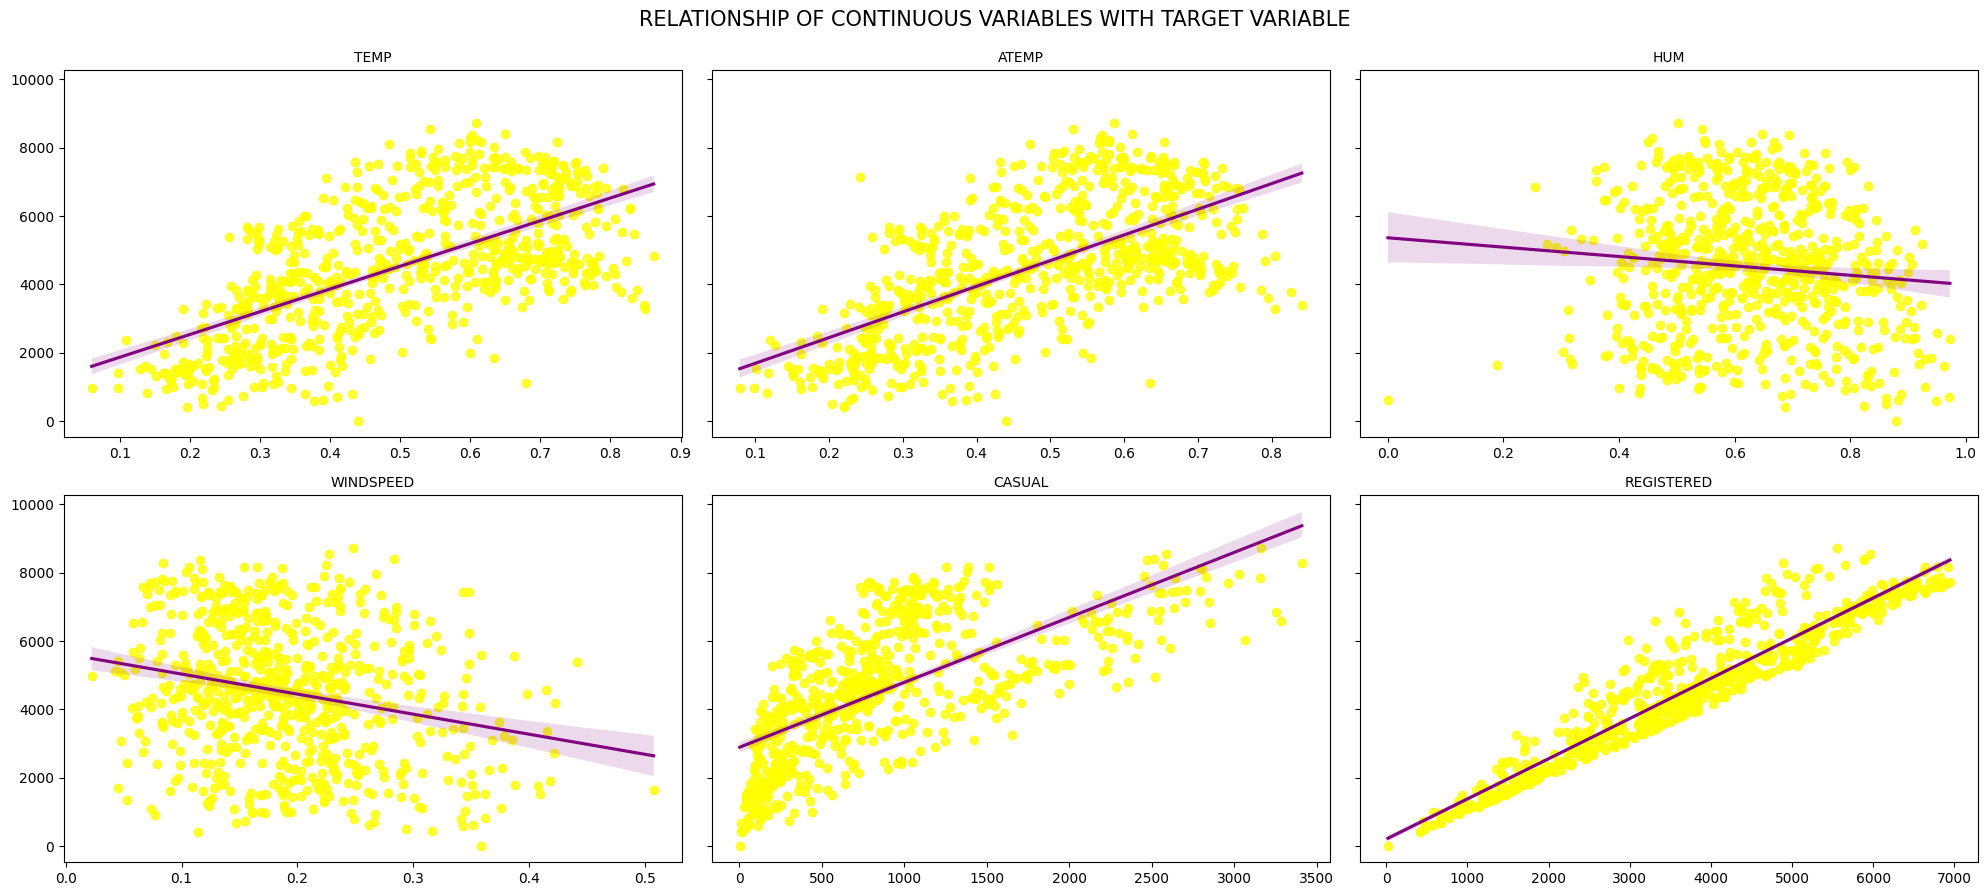

In [58]:
## Bivariate analysis
fig,ax=plt.subplots(2,ncols=int(len(cont_var)/2),figsize=(20,9), sharey=True)

plt.suptitle('Relationship of continuous variables with target variable'.upper(),fontsize=15, fontweight=20, y=0.99)

k=0
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        sns.regplot(x=df[cont_var[k]],y=df['cnt'],ax=ax[i,j],scatter_kws={'color':'yellow'},line_kws={'color':'Purple'})

        ax[i,j].set_title(f'{cont_var[k].upper()}',fontsize=10)
        ax[i,j].set_xlabel('') 
        ax[i,j].set_ylabel('')
        k+=1


plt.tight_layout()
plt.show()       

/tmp/ipykernel_1066/3002351491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby(cat_var[k])['cnt'].mean(),x=df.groupby(cat_var[k])['cnt'].mean().index,ax=ax[i,j],palette='Purples')
/tmp/ipykernel_1066/3002351491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby(cat_var[k])['cnt'].mean(),x=df.groupby(cat_var[k])['cnt'].mean().index,ax=ax[i,j],palette='Purples')
/tmp/ipykernel_1066/3002351491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby(cat_var[k])['cnt'].mean(),x=df.groupby(cat_var[k])['cnt']

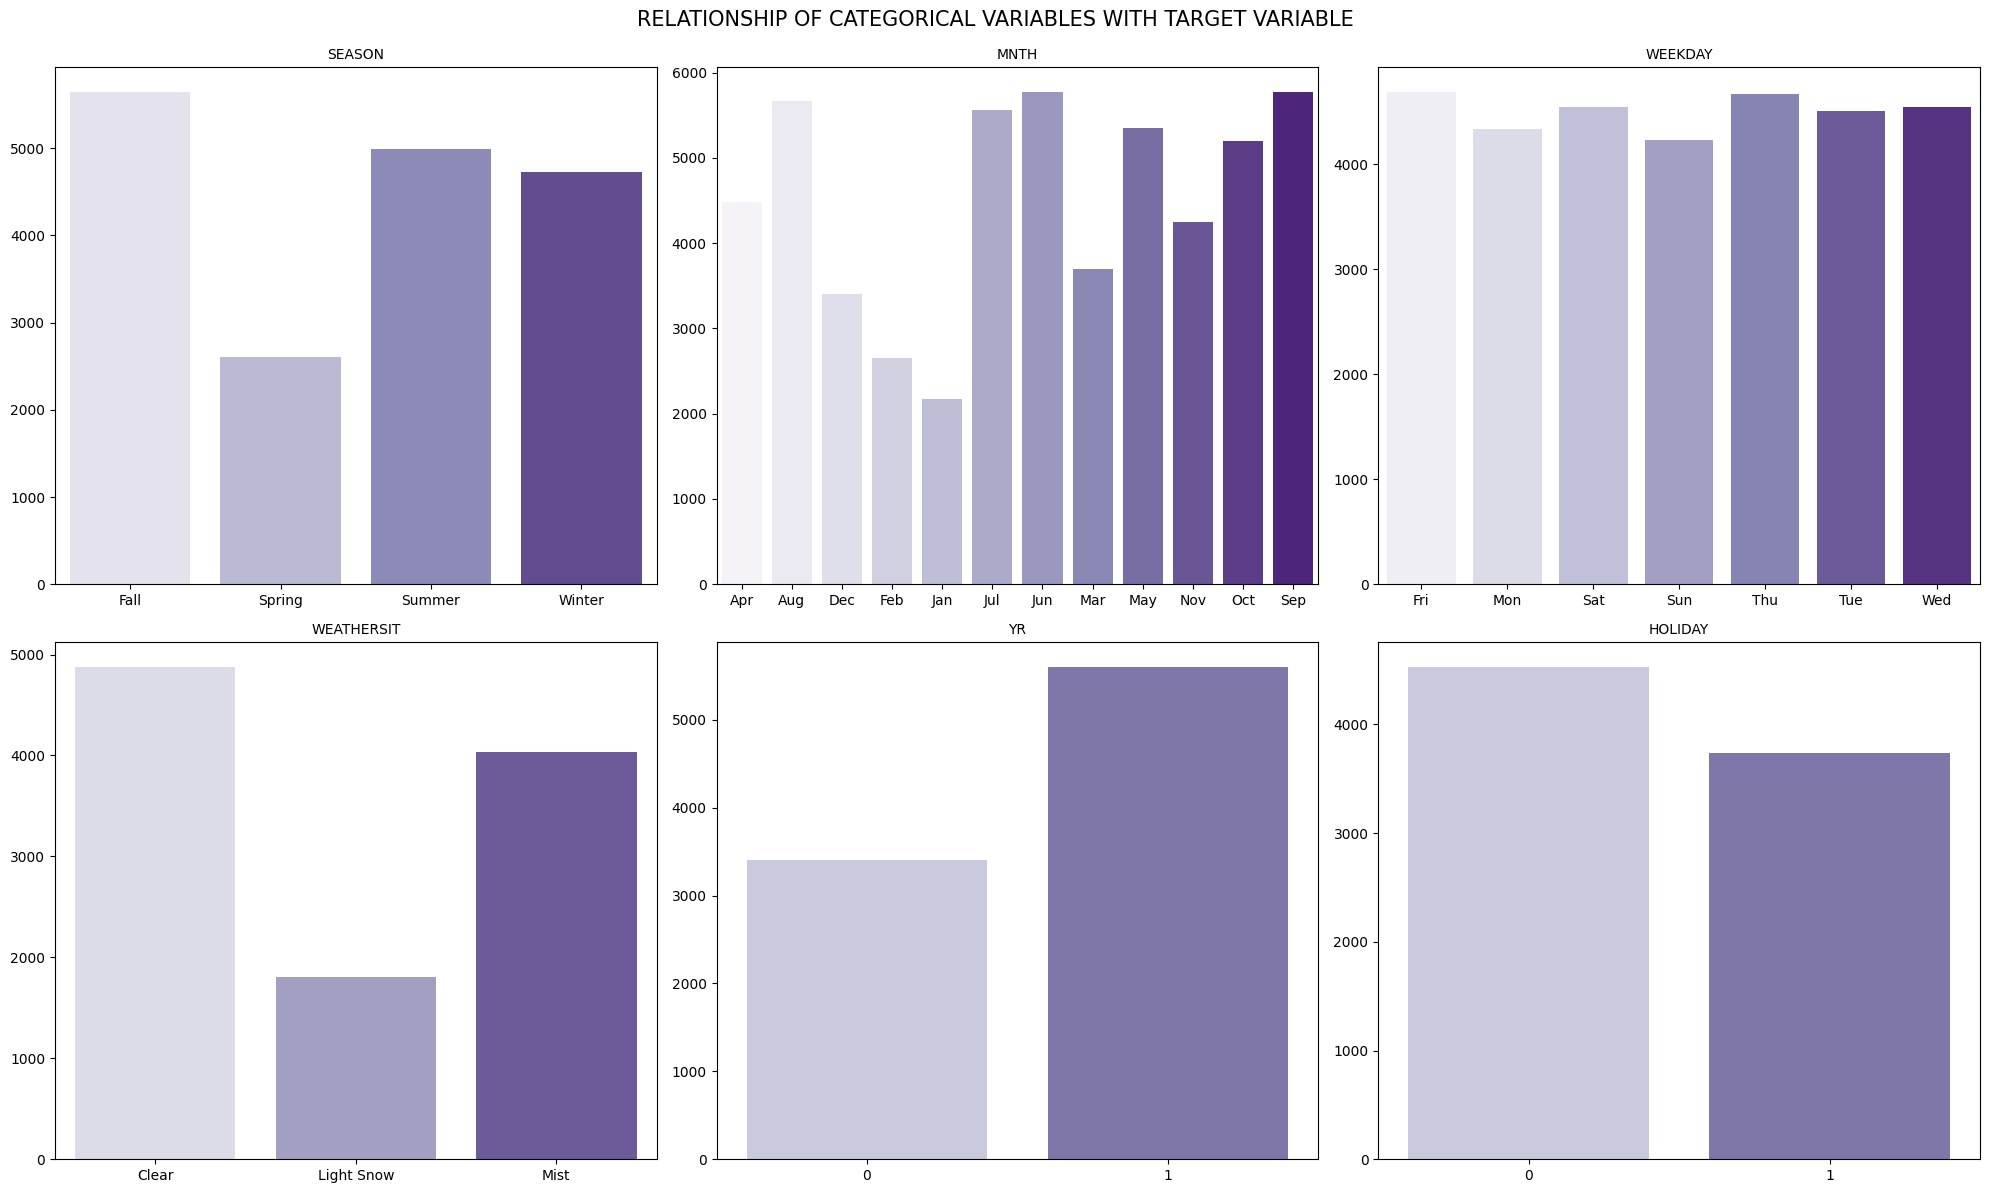

In [59]:
## categorical independent variables
fig,ax=plt.subplots(2,ncols=int(len(cont_var)/2),figsize=(20,12))

plt.suptitle('Relationship of categorical variables with target variable'.upper(),fontsize=15, fontweight=20, y=0.99)

k=0
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        sns.barplot(y=df.groupby(cat_var[k])['cnt'].mean(),x=df.groupby(cat_var[k])['cnt'].mean().index,ax=ax[i,j],palette='Purples')

        ax[i,j].set_title(f'{cat_var[k].upper()}',fontsize=10)
        ax[i,j].set_xlabel('') 
        ax[i,j].set_ylabel('')
        k+=1


plt.tight_layout()
plt.show()

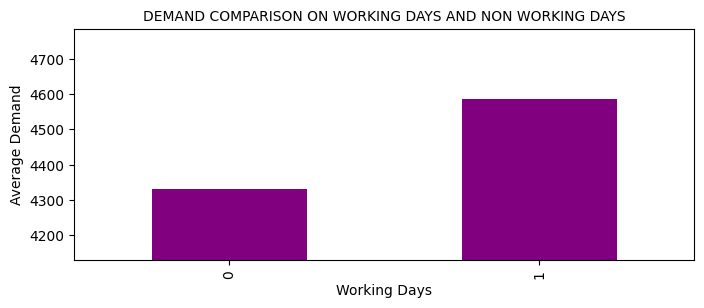

In [60]:
## demand comparison on working days and non working days
plt.figure(figsize=(8,3))
plt.title('Demand comparison on working days and non working days'.upper(),fontsize=10)
df.groupby('workingday')['cnt'].mean().plot(kind='bar',color='purple')
plt.ylabel('average demand'.title(),fontsize=10)
plt.xlabel('working days'.title(),fontsize=10)
plt.ylim(min(df.groupby('workingday')['cnt'].mean())-200,max(df.groupby('workingday')['cnt'].mean())+200)
plt.show()

In [61]:
## seasonwise variation in weather related continuous variables
weather_cont_var=['temp','atemp','hum','windspeed']

/tmp/ipykernel_1066/711699140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby('season')[weather_cont_var[i]].mean(),x=df.groupby('season')[weather_cont_var[i]].mean().index,ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/711699140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby('season')[weather_cont_var[i]].mean(),x=df.groupby('season')[weather_cont_var[i]].mean().index,ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/711699140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby('season')[weathe

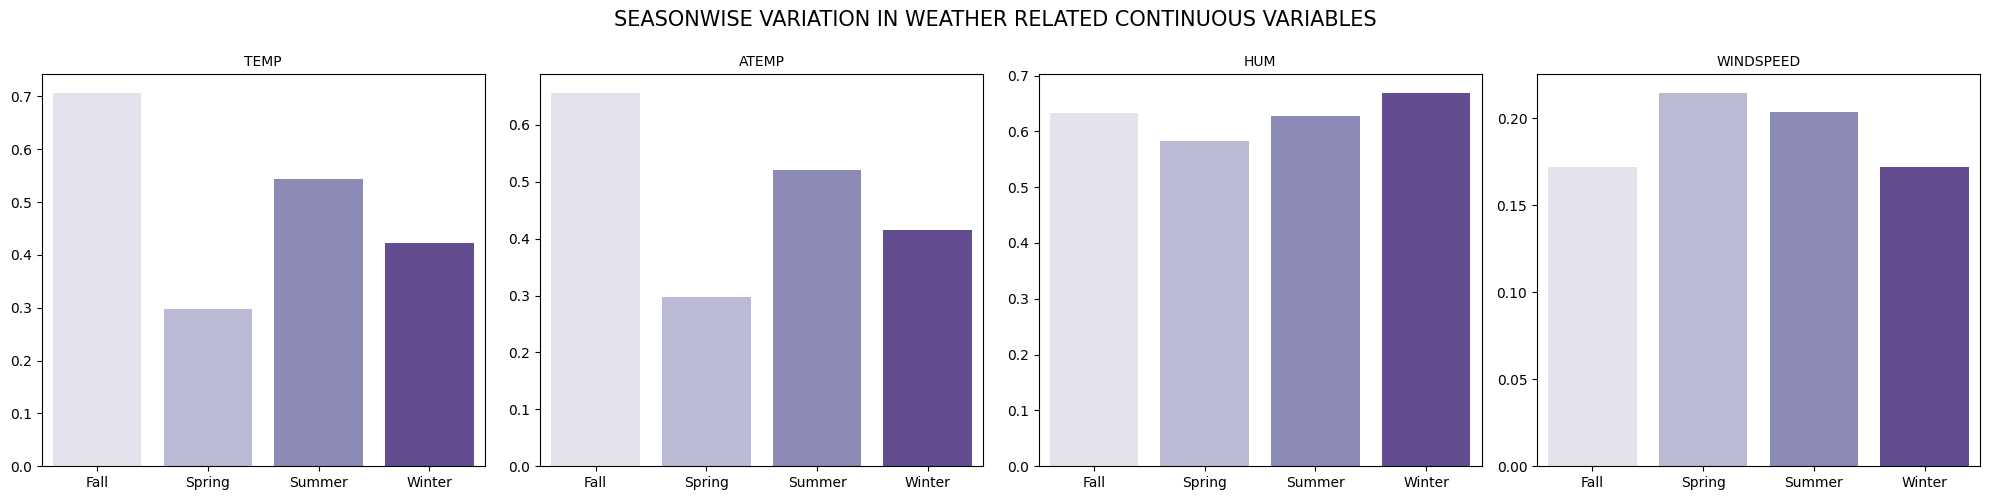

In [62]:
fig,ax=plt.subplots(1,len(weather_cont_var),figsize=(20,5))

plt.suptitle('Seasonwise variation in weather related continuous variables'.upper(),fontsize=15, fontweight=20, y=0.99)

for i in range(len(weather_cont_var)):
    sns.barplot(y=df.groupby('season')[weather_cont_var[i]].mean(),x=df.groupby('season')[weather_cont_var[i]].mean().index,ax=ax[i],palette='Purples')

    ax[i].set_title(f'{weather_cont_var[i].upper()}',fontsize=10)
    ax[i].set_xlabel('') 
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()


<Axes: xlabel='season'>

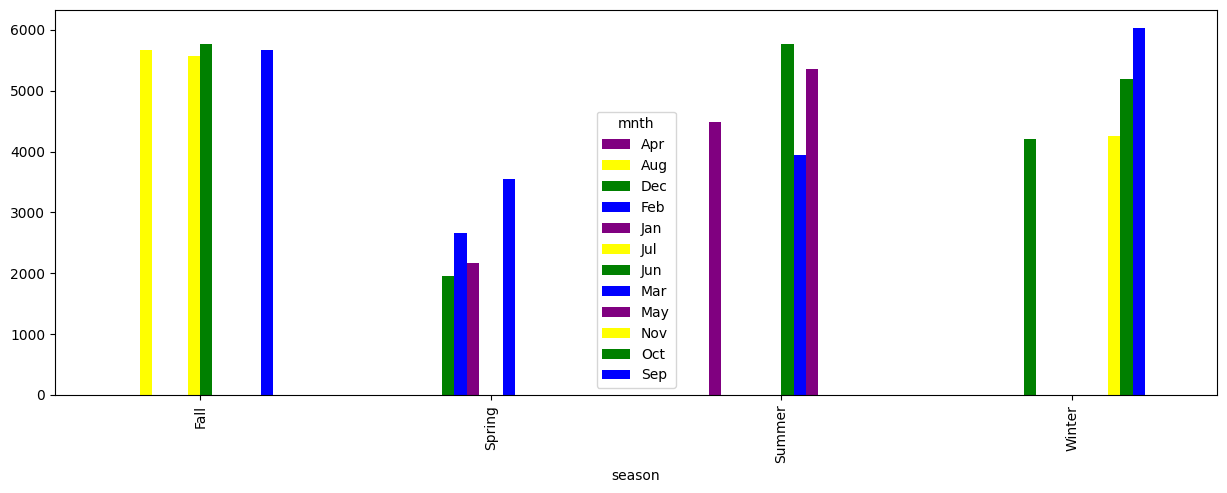

In [63]:
df.groupby(['season','mnth'])['cnt'].mean().unstack().plot(kind='bar',figsize=(15,5),color=['purple','yellow','green','blue'])

In [64]:
df.groupby(['season','mnth'])['cnt'].mean()

season  mnth
Fall    Aug     5664.419355
        Jul     5563.677419
        Jun     5769.400000
        Sep     5672.704545
Spring  Dec     1954.454545
        Feb     2655.298246
        Jan     2176.338710
        Mar     3551.625000
Summer  Apr     4484.900000
        Jun     5773.850000
        Mar     3947.954545
        May     5349.774194
Winter  Dec     4200.950000
        Nov     4247.183333
        Oct     5199.225806
        Sep     6024.500000
Name: cnt, dtype: float64

/tmp/ipykernel_1066/4126044919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby('weathersit')[weather_cont_var[i]].mean(),x=df.groupby('weathersit')[weather_cont_var[i]].mean().index,ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/4126044919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby('weathersit')[weather_cont_var[i]].mean(),x=df.groupby('weathersit')[weather_cont_var[i]].mean().index,ax=ax[i],palette='Purples')
/tmp/ipykernel_1066/4126044919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.group

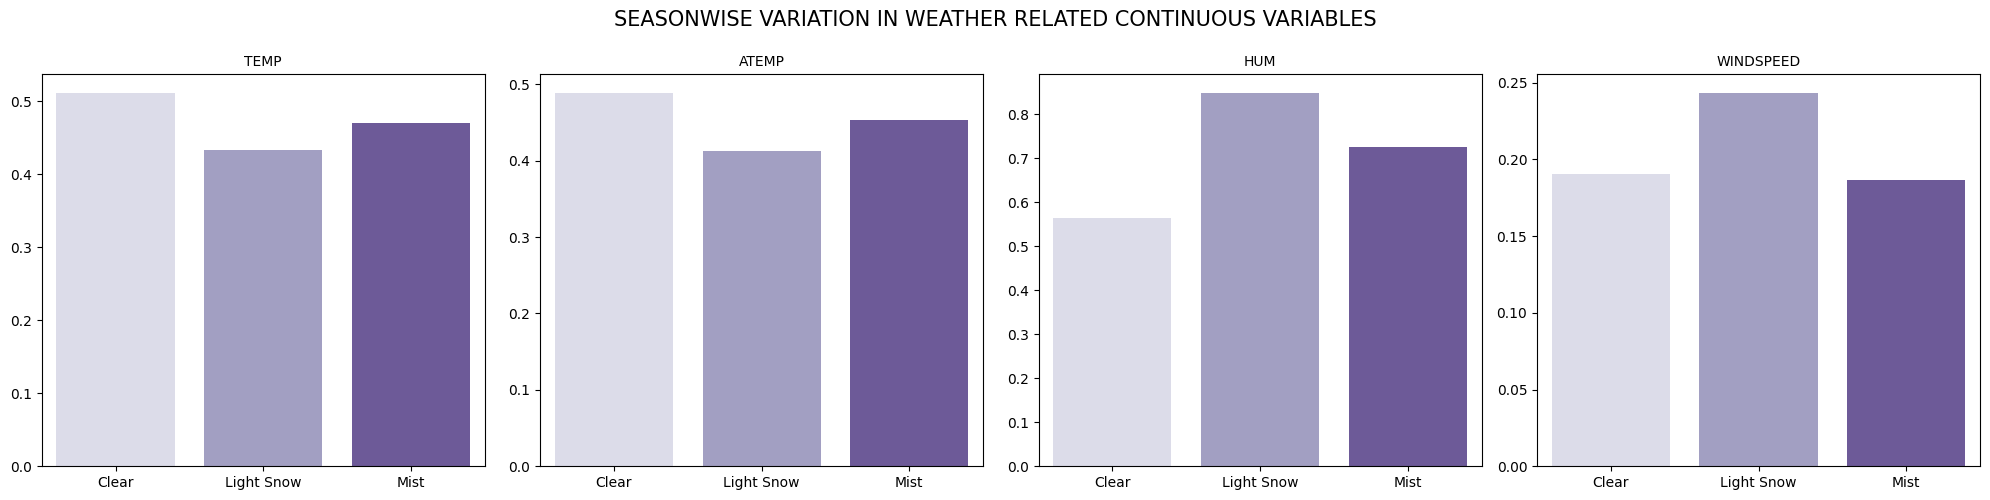

In [68]:
fig,ax=plt.subplots(1,len(weather_cont_var),figsize=(20,5))

plt.suptitle('Seasonwise variation in weather related continuous variables'.upper(),fontsize=15, fontweight=20, y=0.99)

for i in range(len(weather_cont_var)):
    sns.barplot(y=df.groupby('weathersit')[weather_cont_var[i]].mean(),x=df.groupby('weathersit')[weather_cont_var[i]].mean().index,ax=ax[i],palette='Purples')

    ax[i].set_title(f'{weather_cont_var[i].upper()}',fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

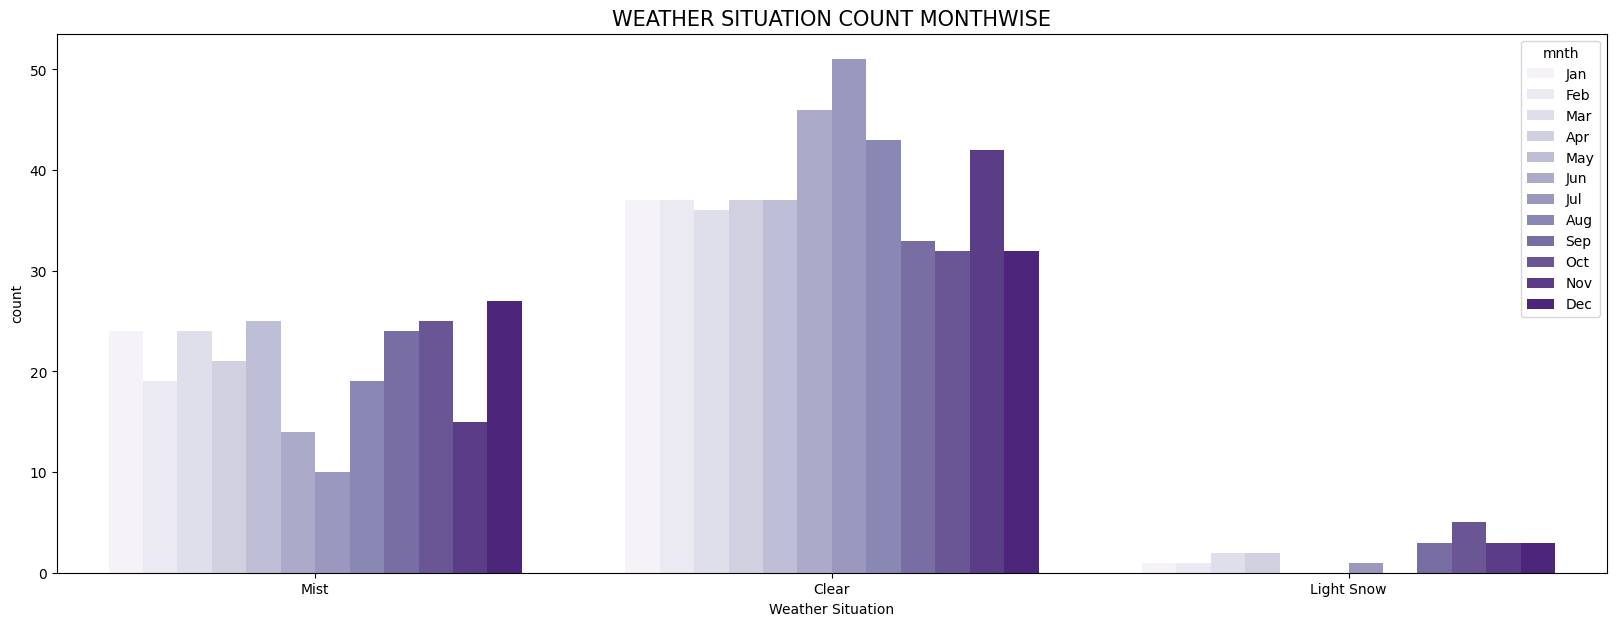

In [70]:
plt.figure(figsize=(20,7))

sns.countplot(x='weathersit',data=df,hue='mnth',palette='Purples')

plt.title('Weather situation count monthwise'.upper(),fontsize=15, fontweight=20)
plt.xlabel('Weather Situation'.title(),fontsize=10)

plt.show()



/home/killdollar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/killdollar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/killdollar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/killdollar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/killdollar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/killdollar/.local/lib/python3.10/site-packages/seaborn

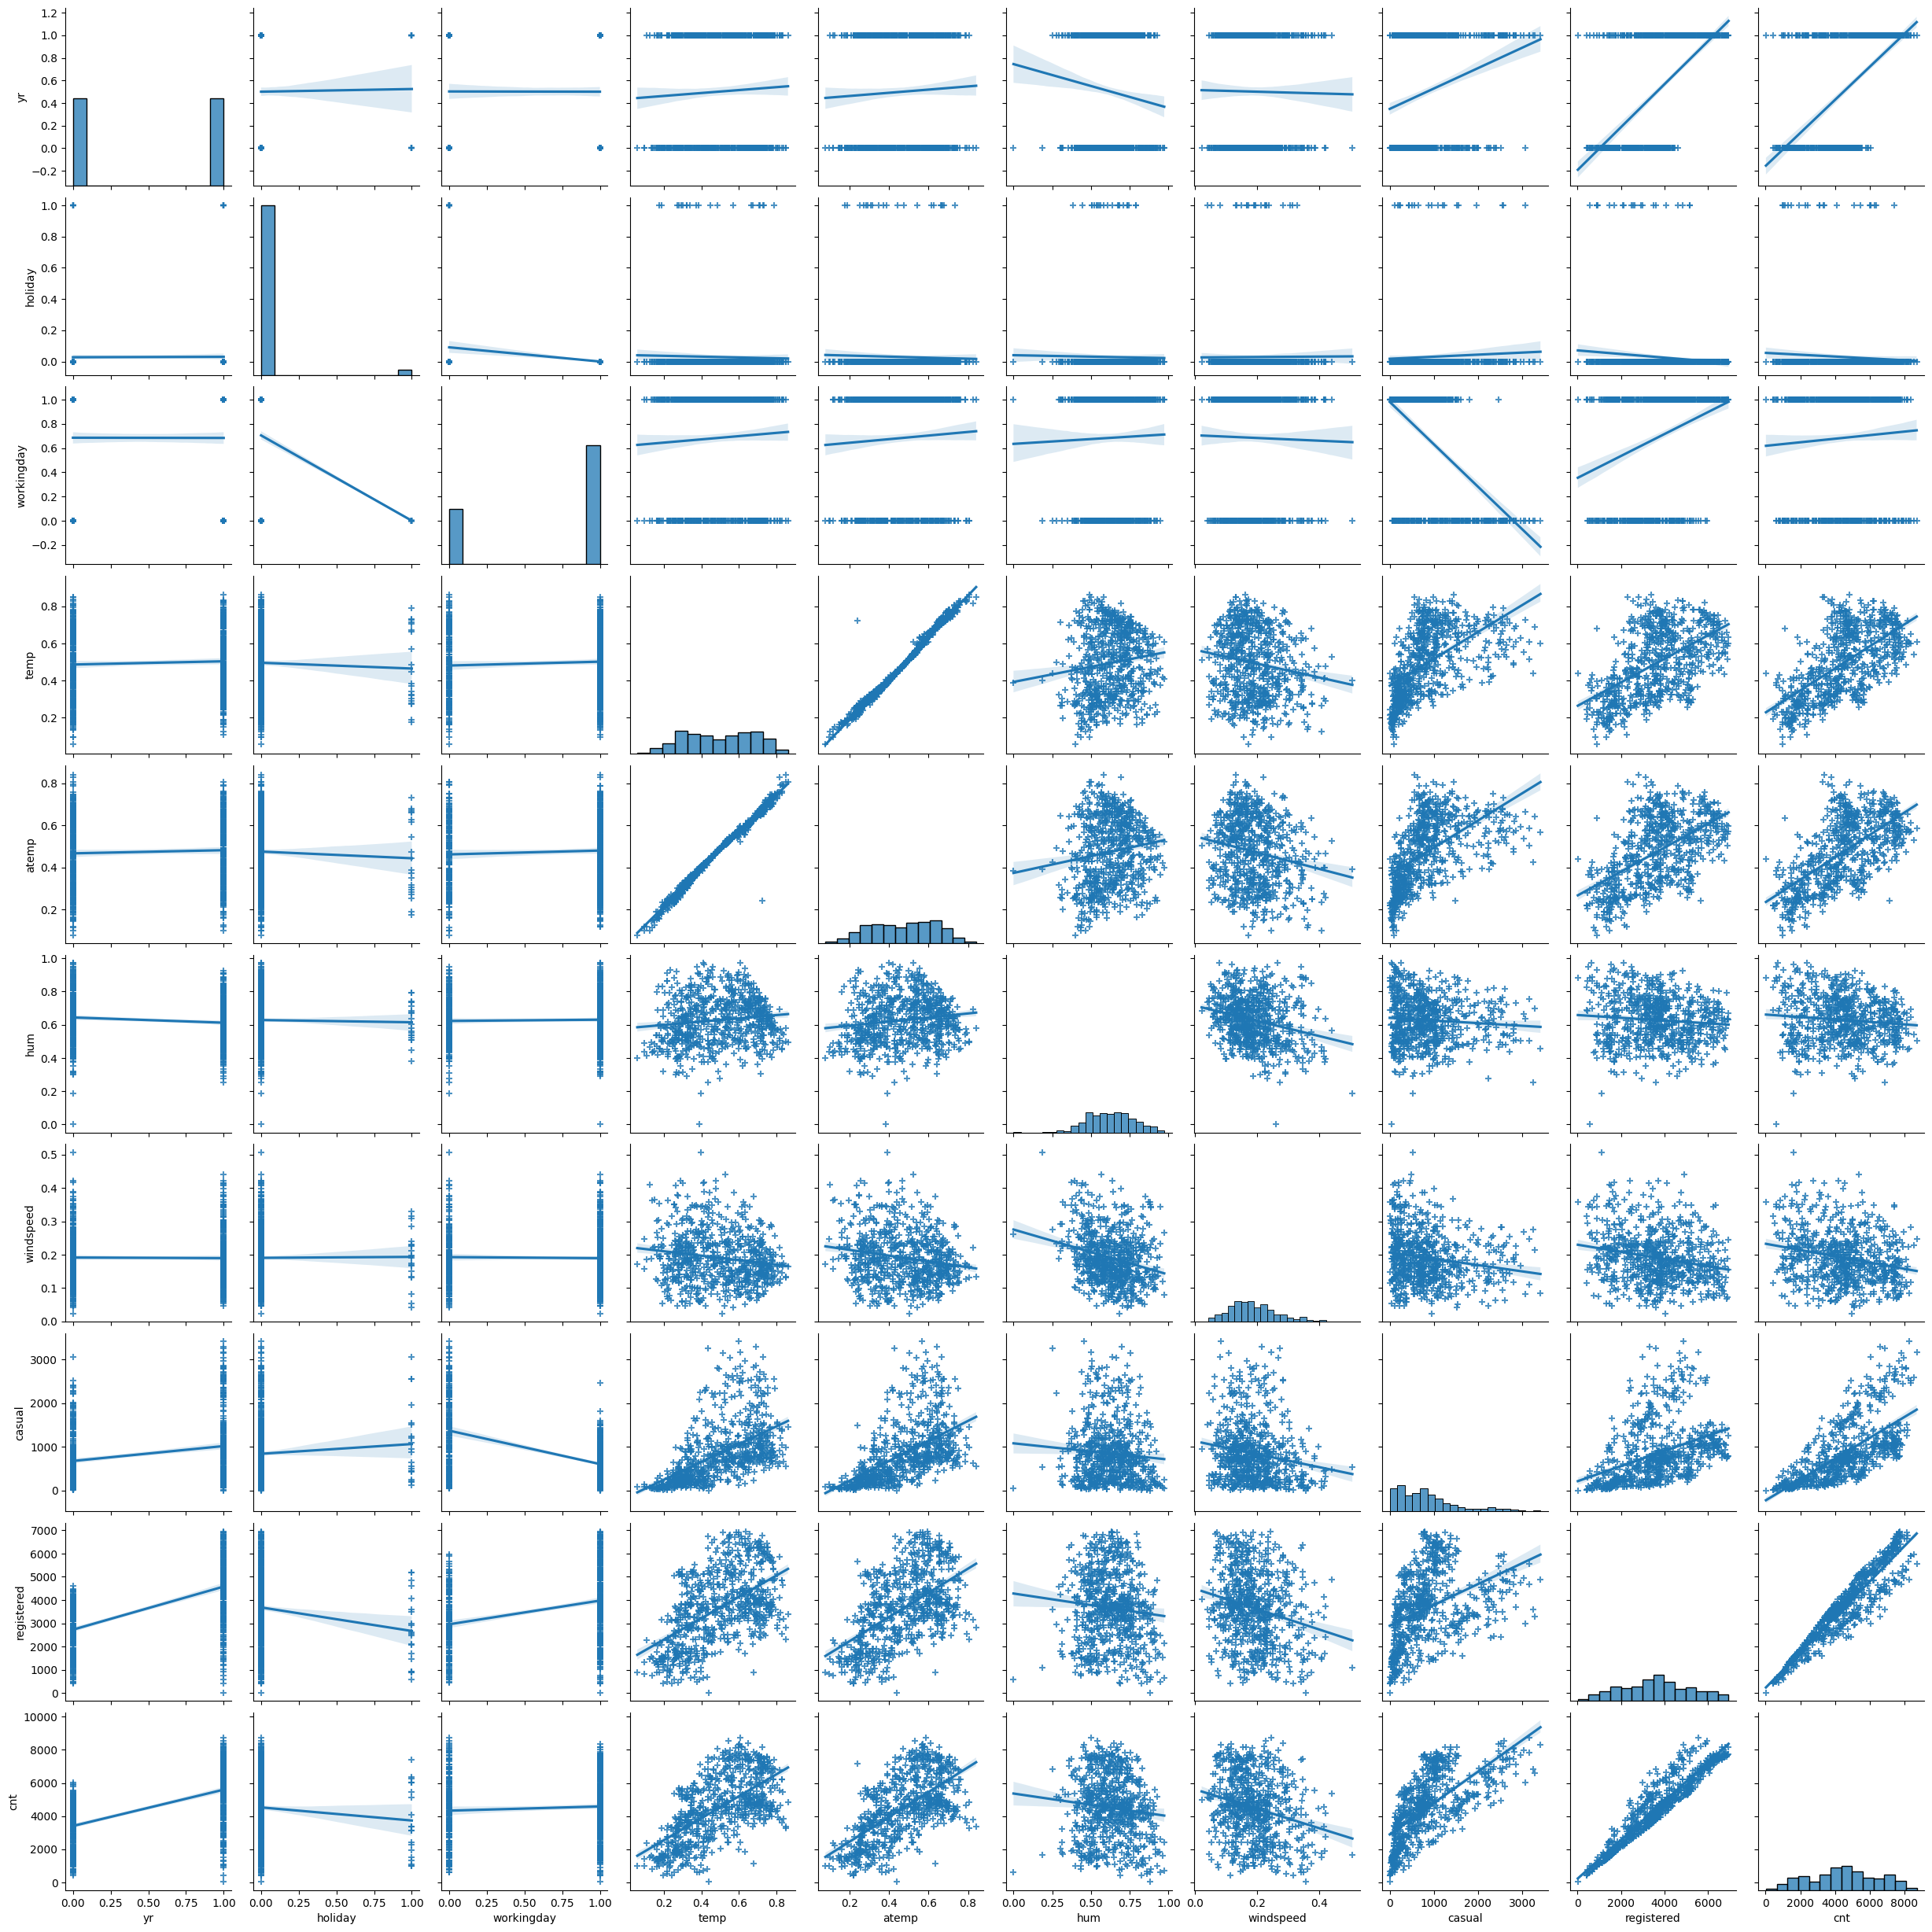

In [71]:
sns.pairplot(df,kind='reg',markers='+',palette='Purples')
plt.show()

In [73]:
df.drop(labels=['casual','registered'],axis=1,inplace=True)

In [74]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,985
1,Spring,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,801
2,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


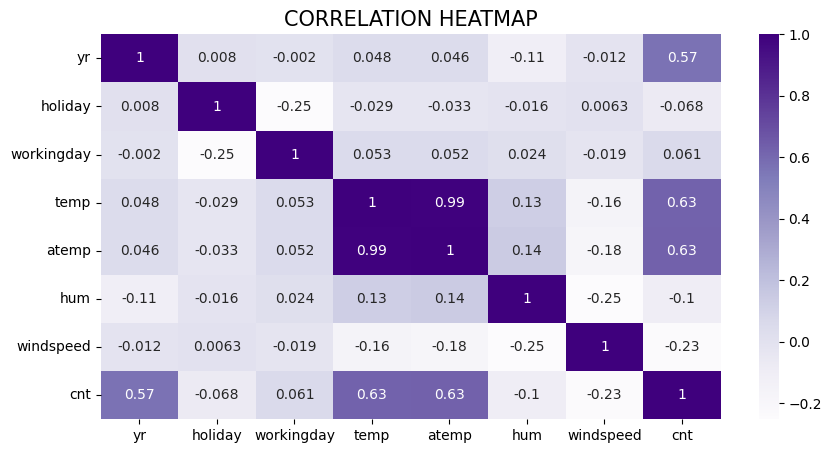

In [77]:
# Filter dataframe to include only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Now create the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Purples')
plt.title('Correlation heatmap'.upper(),fontsize=15, fontweight=20)
plt.show()

In [78]:
growth_pd=df.pivot_table(index='mnth',columns='yr',values='cnt',aggfunc='mean')

growth_pd.columns=['2018','2019']
growth_pd['percent growth']=round((growth_pd['2019']-growth_pd['2018'])/growth_pd['2018']*100,2)

growth_pd= growth_pd.sort_values(by='percent growth',ascending=False)

growth_pd

,2018,2019,percent growth
mnth,,,
Mar,2065.967742,5318.548387,157.44
Jan,1231.903226,3120.774194,153.33
Feb,1721.964286,3556.448276,106.53
Apr,3162.333333,5807.466667,83.64
Sep,4247.266667,7285.766667,71.54
Oct,3984.225806,6414.225806,60.99
Aug,4409.387097,6919.451613,56.93
Nov,3405.566667,5088.800000,49.43
May,4381.322581,6318.225806,44.21


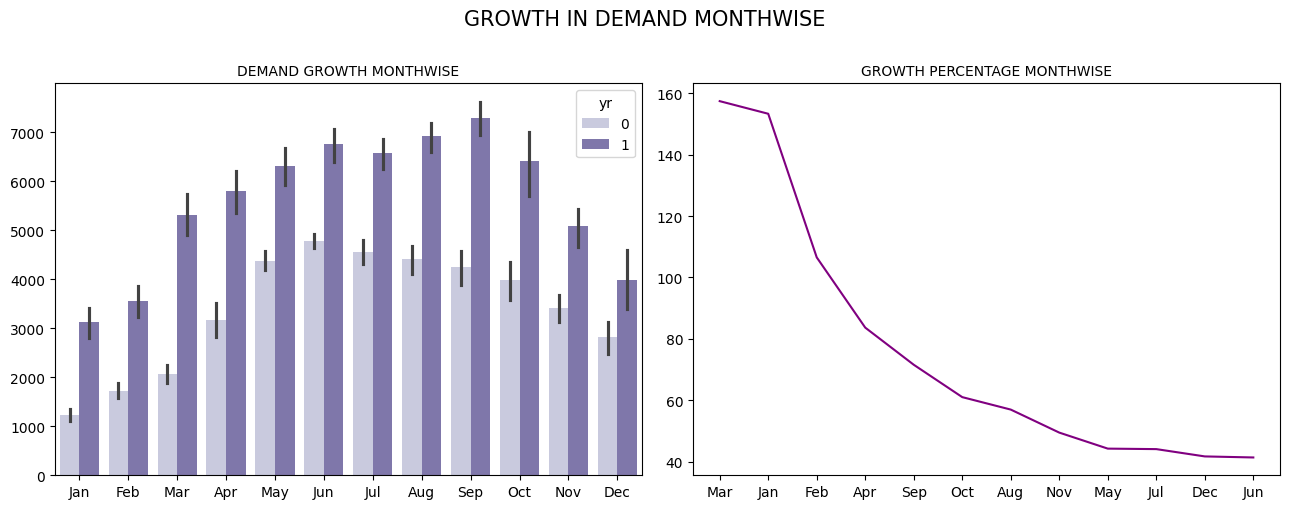

In [79]:
fig,ax=plt.subplots(1,2,figsize=(13,5))

plt.suptitle('Growth in demand monthwise'.upper(),fontsize=15, fontweight=20,y=1.01)

sns.barplot(x='mnth',y='cnt',data=df,hue='yr',ax=ax[0],palette='Purples')
ax[0].set_title('Demand growth monthwise'.upper(),fontsize=10, fontweight=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.lineplot(x=growth_pd.index,y='percent growth',data=growth_pd,ax=ax[1],color='purple')
ax[1].set_title('Growth percentage monthwise'.upper(),fontsize=10, fontweight=20)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [80]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,985
1,Spring,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,801
2,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


## Model development

In [81]:
df_ml=df.copy()

In [131]:
dummy_list=[i for i in df_ml.select_dtypes(include='object').columns]

for i in dummy_list:
    my_d=pd.get_dummies(data=df_ml[i],drop_first=True)
    df_ml=pd.concat([df_ml,my_d],axis=1).drop(labels=i,axis=1)

In [132]:
df_ml.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [133]:
df_ml = df_ml.replace({True: 1, False: 0})

In [134]:
df_ml.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [135]:
print(f'our new dataset post dummy creation has {df_ml.shape[1]} columns')

our new dataset post dummy creation has 30 columns


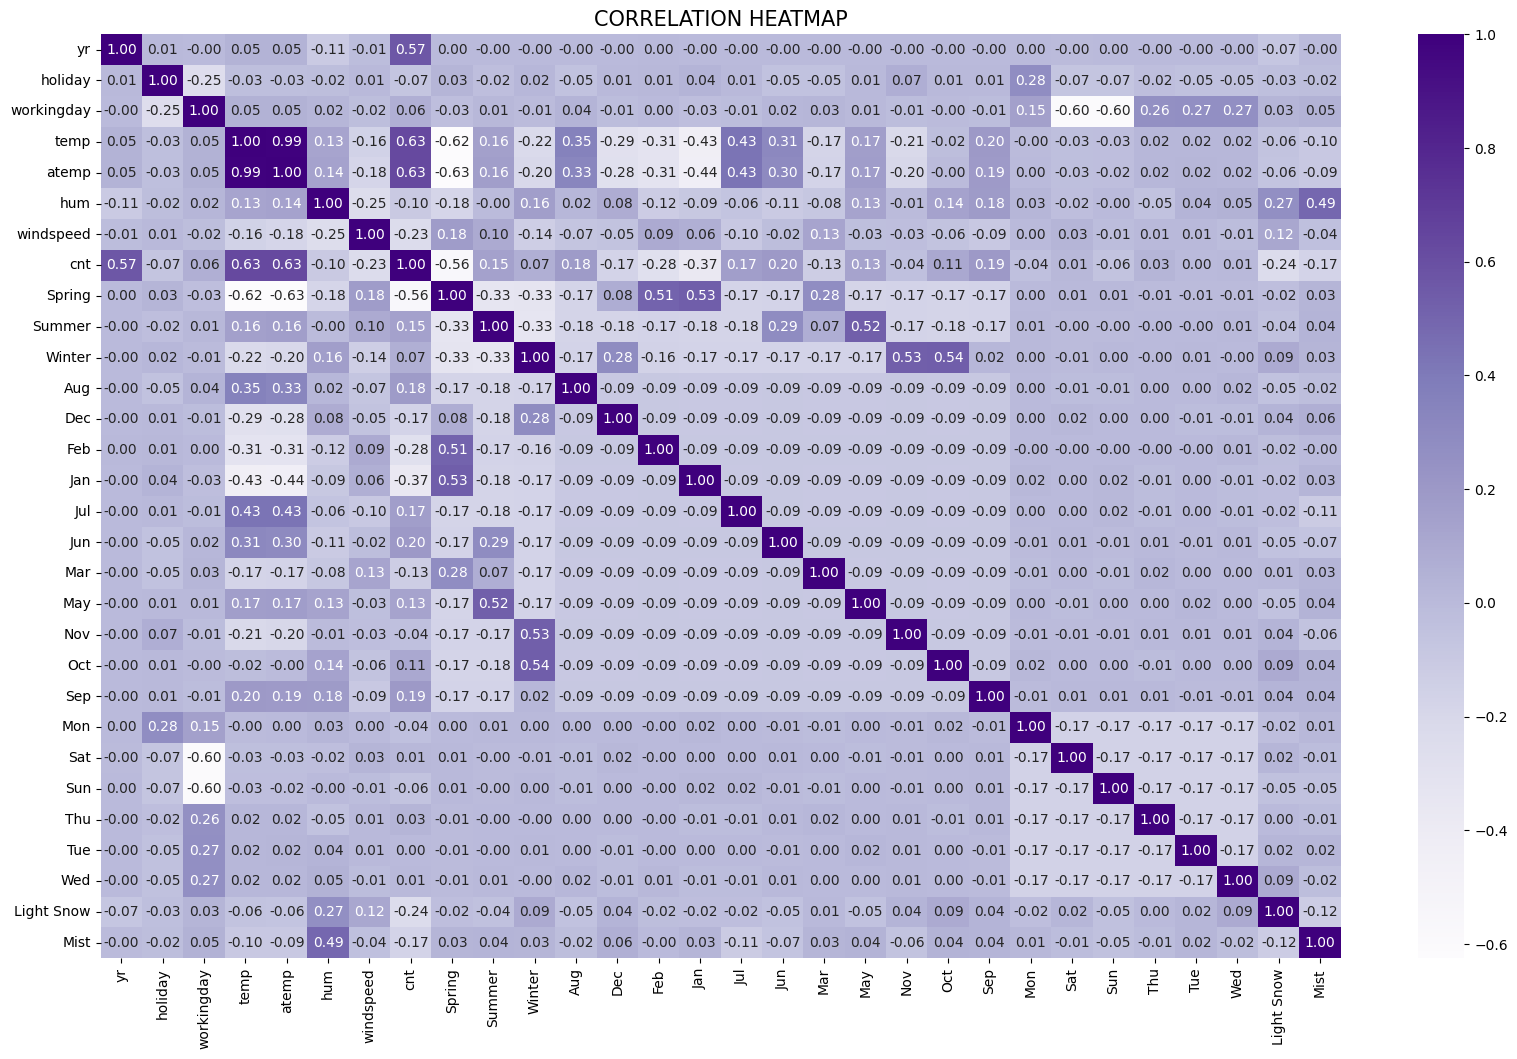

In [136]:
## heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df_ml.corr(),annot=True,cmap='Purples',fmt='.2f')
plt.title('Correlation heatmap'.upper(),fontsize=15, fontweight=20)
plt.show()

In [137]:
col_list=[]
ind_list=[]
corr_type=[]
corr_strength=[]
corr_list=[]

for i in range(len(df_ml.corr().columns)):
    for j in range(len(df_ml.corr().index)):
        if df_ml.corr().columns[i]!=df_ml.corr().index[j] and df_ml.corr().iloc[i,j] !=0:
            if df_ml.corr().iloc[i,j]<0:
                if df_ml.corr().iloc[i,j]<-0.7 :
                    col_list.append(df_ml.corr().columns[i])
                    ind_list.append(df_ml.corr().index[j])
                    corr_type.append('Negative')
                    corr_strength.append('Strong')
                    corr_list.append(df_ml.corr().iloc[i,j])
                elif df_ml.corr().iloc[i,j]< -0.3:
                    col_list.append(df_ml.corr().columns[i])
                    ind_list.append(df_ml.corr().index[j])
                    corr_type.append('Negative')
                    corr_strength.append('Moderate')
                    corr_list.append(df_ml.corr().iloc[i,j])
            else:
                if df_ml.corr().iloc[i,j]>=0.7 :
                    col_list.append(df_ml.corr().columns[i])
                    ind_list.append(df_ml.corr().index[j])
                    corr_type.append('Positive')
                    corr_strength.append('Strong')
                    corr_list.append(df_ml.corr().iloc[i,j])
                elif df_ml.corr().iloc[i,j]>0.3:
                    col_list.append(df_ml.corr().columns[i])
                    ind_list.append(df_ml.corr().index[j])
                    corr_type.append('Positive')
                    corr_strength.append('Moderate')
                    corr_list.append(df_ml.corr().iloc[i,j])
            

In [138]:
df_corr=pd.DataFrame({'Column1':col_list,'Column2':ind_list,'Correlation Type':corr_type,'Correlation Strength':corr_strength,'Correlation Value':corr_list})
df_corr

,Column1,Column2,Correlation Type,Correlation Strength,Correlation Value
0,yr,cnt,Positive,Moderate,0.566710
1,workingday,Sat,Negative,Moderate,-0.602541
2,workingday,Sun,Negative,Moderate,-0.602541
3,temp,atemp,Positive,Strong,0.991702
4,temp,cnt,Positive,Moderate,0.627494
5,temp,Spring,Negative,Moderate,-0.619800
6,temp,Aug,Positive,Moderate,0.354804
7,temp,Feb,Negative,Moderate,-0.311845
8,temp,Jan,Negative,Moderate,-0.430932
9,temp,Jul,Positive,Moderate,0.432837


In [139]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,985
1,Spring,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,801
2,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [140]:
#import train test split
from sklearn.model_selection import train_test_split

In [141]:
bb_train,bb_test= train_test_split(df_ml,train_size=0.70,random_state=100)


In [142]:
print(f'Our training dataset has {bb_train.shape[0]} rows and {bb_train.shape[1]} columns')
print(f'Our testing dataset has {bb_test.shape[0]} rows and {bb_test.shape[1]} columns')

Our training dataset has 511 rows and 30 columns
Our testing dataset has 220 rows and 30 columns


In [143]:
bb_train.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
45,0,0,1,0.266087,0.254274,0.314348,0.291374,1815,1,0,...,0,0,0,0,0,0,1,0,0,0
665,1,0,0,0.530000,0.515133,0.720000,0.235692,7852,0,0,...,1,0,0,1,0,0,0,0,0,1
422,1,0,1,0.366667,0.357954,0.490833,0.268033,4322,1,0,...,0,0,1,0,0,0,0,0,0,0
573,1,0,1,0.781667,0.734217,0.594583,0.152992,6904,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,0,1,0.708333,0.654042,0.415000,0.125621,4905,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#import minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler=MinMaxScaler()

In [146]:
scaler_list=[i for i in bb_train.columns if bb_train[i].nunique()>2]

bb_train[scaler_list]=scaler.fit_transform(bb_train[scaler_list])

In [147]:
bb_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
576,1,0,1,0.836974,0.795348,0.689137,0.239301,0.814887,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,1,0.366591,0.368552,0.677114,0.220569,0.364933,1,0,...,0,0,0,0,0,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,1,0.496388,0.490358,0.413052,0.656397,0.714565,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


## Splitting in X and y

In [148]:
y_train=bb_train.pop('cnt')
X_train=bb_train

In [149]:
print(f'Our training dataset has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Our target variable has {y_train.shape[0]} rows')

Our training dataset has 511 rows and 29 columns
Our target variable has 511 rows


In [150]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
576,1,0,1,0.836974,0.795348,0.689137,0.239301,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,1,0.366591,0.368552,0.677114,0.220569,1,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,1,0.496388,0.490358,0.413052,0.656397,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [151]:
y_train.head()

576    0.814887
426    0.364933
729    0.204096
482    0.714565
111    0.191095
Name: cnt, dtype: float64

## Recursive feature elimination

In [152]:
##importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [153]:
lm=LinearRegression()

lm.fit(X_train,y_train)

# Specify n_features_to_select as a keyword argument
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [154]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 12),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 10),
 ('Tue', False, 14),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [155]:
temp_rfe_df=pd.DataFrame()

temp_rfe_df['Col']=X_train.columns

temp_rfe_df['RFE_Support']=rfe.support_

temp_rfe_df=temp_rfe_df[temp_rfe_df['RFE_Support']==True]

temp_rfe_df

,Col,RFE_Support
0,yr,True
3,temp,True
5,hum,True
6,windspeed,True
7,Spring,True
9,Winter,True
11,Dec,True
12,Feb,True
13,Jan,True
14,Jul,True


In [156]:
my_cols=[i for i in temp_rfe_df['Col']]

X_train[my_cols].head()

,yr,temp,hum,windspeed,Spring,Winter,Dec,Feb,Jan,Jul,Nov,Sep,Sat,Light Snow,Mist
576,1,0.836974,0.689137,0.239301,0,0,0,0,0,1,0,0,0,0,0
426,1,0.366591,0.677114,0.220569,1,0,0,0,0,0,0,0,0,0,1
729,1,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0,0
482,1,0.496388,0.413052,0.656397,0,0,0,0,0,0,0,0,0,0,0
111,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,0,0,1


In [157]:
print(f'Our training dataset has {X_train[my_cols].shape[0]} rows and {X_train[my_cols].shape[1]} columns')

Our training dataset has 511 rows and 15 columns


In [158]:
#import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
## ordinary least square and variance influence factor and p values
import statsmodels.api as sm

def vif_table(dataframe):
    vif=pd.DataFrame()
    vif['Features']=dataframe.columns
    vif['VIF']=[round(variance_inflation_factor(dataframe.values,i),2) for i in range(len(dataframe.columns))]
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif


In [160]:
def regmodel_ols(y_dataframe,X_dataframe):
    X_dataframe=sm.add_constant(X_dataframe)
    model=sm.OLS(y_dataframe,X_dataframe).fit()
    print(model.summary())

In [161]:
X_train_1=X_train[my_cols]

In [162]:
regmodel_ols(y_train,X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          2.78e-192
Time:                        16:49:37   Log-Likelihood:                 520.44
No. Observations:                 511   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -941.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3899      0.031     12.651      0.0

In [163]:
vif_table(X_train_1)

,Features,VIF
2,hum,24.76
1,temp,17.20
3,windspeed,4.26
4,Spring,4.15
5,Winter,2.96
8,Jan,2.36
14,Mist,2.34
0,yr,2.07
7,Feb,1.94
10,Nov,1.83


In [164]:
X_train_2=X_train_1.drop('hum',axis=1)

regmodel_ols(y_train,X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.0
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          2.00e-189
Time:                        16:59:22   Log-Likelihood:                 510.87
No. Observations:                 511   AIC:                            -991.7
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3107      0.025     12.281      0.0

In [165]:
vif_table(X_train_2)

,Features,VIF
1,temp,4.87
2,windspeed,4.24
3,Spring,3.80
4,Winter,2.56
7,Jan,2.19
0,yr,2.07
6,Feb,1.90
9,Nov,1.78
5,Dec,1.55
13,Mist,1.54


In [167]:
X_train_3=X_train_2.drop('Feb',axis=1)

regmodel_ols(y_train,X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          2.87e-189
Time:                        17:01:37   Log-Likelihood:                 507.73
No. Observations:                 511   AIC:                            -987.5
Df Residuals:                     497   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.025     11.967      0.0

In [168]:
vif_table(X_train_3)

,Features,VIF
1,temp,4.84
2,windspeed,4.23
4,Winter,2.52
3,Spring,2.37
0,yr,2.06
8,Nov,1.77
6,Jan,1.64
12,Mist,1.54
5,Dec,1.46
7,Jul,1.37


In [169]:
X_train_4=X_train_3.drop('Sep',axis=1)

regmodel_ols(y_train,X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          5.15e-189
Time:                        17:02:50   Log-Likelihood:                 504.32
No. Observations:                 511   AIC:                            -982.6
Df Residuals:                     498   BIC:                            -927.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2981      0.025     11.883      0.0

In [170]:
vif_table(X_train_4)

,Features,VIF
1,temp,4.46
2,windspeed,4.20
4,Winter,2.52
3,Spring,2.37
0,yr,2.06
8,Nov,1.75
6,Jan,1.64
11,Mist,1.54
5,Dec,1.45
7,Jul,1.33


In [171]:
X_train_5=X_train_4.drop('Sat',axis=1)

regmodel_ols(y_train,X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.7
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          7.56e-189
Time:                        17:03:44   Log-Likelihood:                 501.09
No. Observations:                 511   AIC:                            -978.2
Df Residuals:                     499   BIC:                            -927.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3029      0.025     12.049      0.0

In [172]:
vif_table(X_train_5)

,Features,VIF
1,temp,4.42
2,windspeed,4.17
4,Winter,2.51
3,Spring,2.36
0,yr,2.06
8,Nov,1.75
6,Jan,1.63
10,Mist,1.54
5,Dec,1.45
7,Jul,1.32


In [173]:
X_train_6=X_train_5.drop('Jan',axis=1)

regmodel_ols(y_train,X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     252.0
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          4.38e-188
Time:                        17:05:37   Log-Likelihood:                 496.42
No. Observations:                 511   AIC:                            -970.8
Df Residuals:                     500   BIC:                            -924.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2816      0.024     11.571      0.0

In [174]:
X_train_7=X_train_6.drop('Dec',axis=1)

regmodel_ols(y_train,X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     275.3
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          1.36e-187
Time:                        17:06:05   Log-Likelihood:                 492.35
No. Observations:                 511   AIC:                            -964.7
Df Residuals:                     501   BIC:                            -922.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2677      0.024     11.152      0.0

In [175]:
X_train_8=X_train_7.drop('Nov',axis=1)

regmodel_ols(y_train,X_train_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     306.1
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          1.26e-187
Time:                        17:06:26   Log-Likelihood:                 489.47
No. Observations:                 511   AIC:                            -960.9
Df Residuals:                     502   BIC:                            -922.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2611      0.024     10.899      0.0

In [176]:
vif_table(X_train_8)

,Features,VIF
1,temp,4.35
2,windspeed,4.12
0,yr,2.05
3,Spring,1.66
7,Mist,1.52
4,Winter,1.35
5,Jul,1.32
6,Light Snow,1.08


## Residual analysis

In [177]:
lm=sm.OLS(y_train,X_train_8).fit()
y_train_pred=lm.predict(X_train_8)
residual=y_train-y_train_pred

/tmp/ipykernel_1066/1837801539.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=10,ax=ax[1],color='purple')


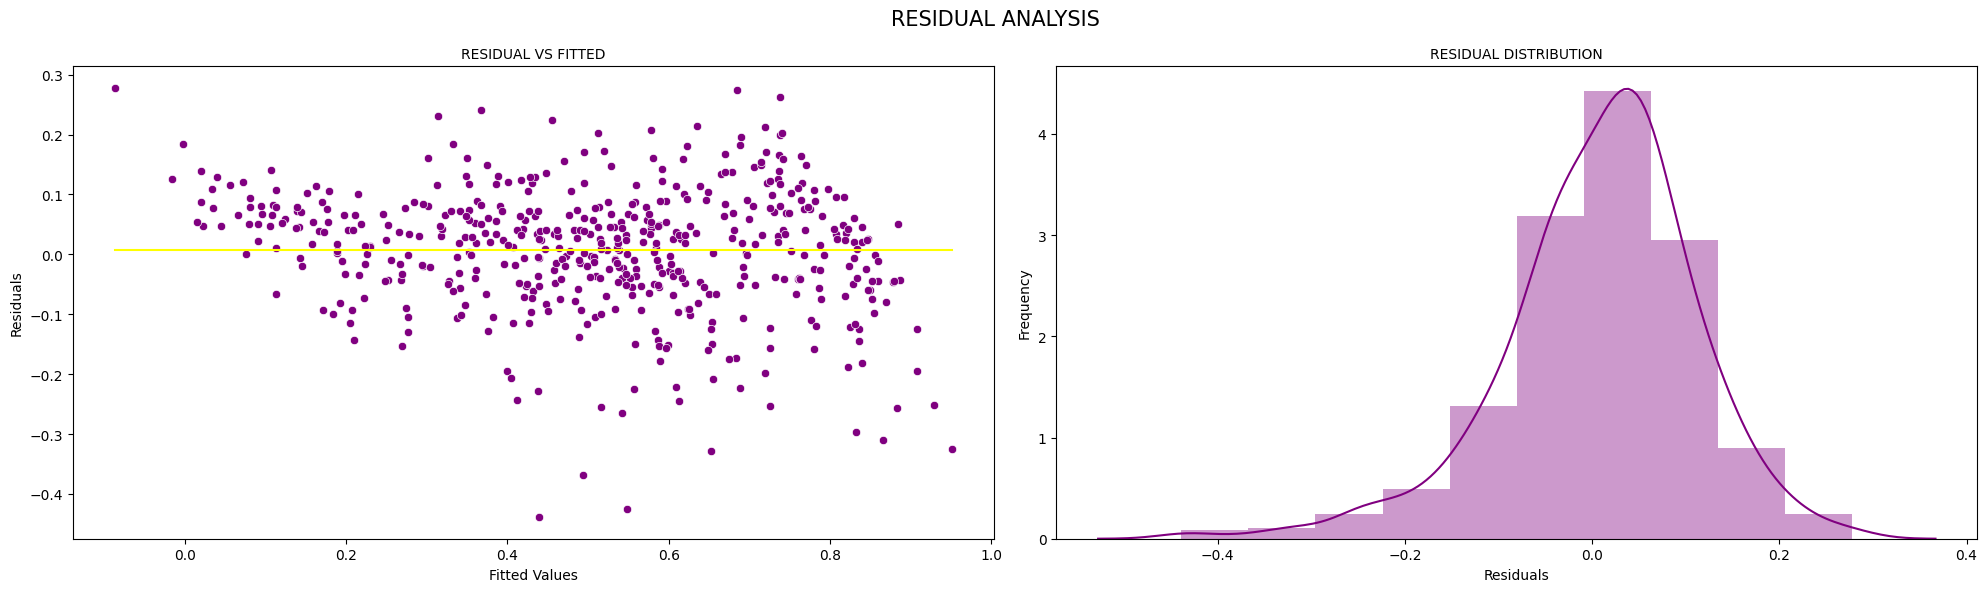

In [178]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

plt.suptitle('Residual Analysis'.upper(),fontsize=15, fontweight=20)

sns.scatterplot(y=residual,x=y_train_pred.values,ax=ax[0],color='purple')
sns.lineplot(y=residual.mean(),x=y_train_pred.values,ax=ax[0],color='yellow')

ax[0].set_title('Residual vs Fitted'.upper(),fontsize=10, fontweight=20)
ax[0].set_xlabel('Fitted Values'.title(),fontsize=10)
ax[0].set_ylabel('Residuals'.title(),fontsize=10)

sns.distplot(residual,bins=10,ax=ax[1],color='purple')

ax[1].set_title('Residual Distribution'.upper(),fontsize=10, fontweight=20)
ax[1].set_xlabel('Residuals'.title(),fontsize=10)
ax[1].set_ylabel('Frequency'.title(),fontsize=10)

plt.tight_layout()
plt.show()

## Testing for Homoscedasiticity

/tmp/ipykernel_1066/1964114654.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_train_pred,y=y_train,palette='Purples')


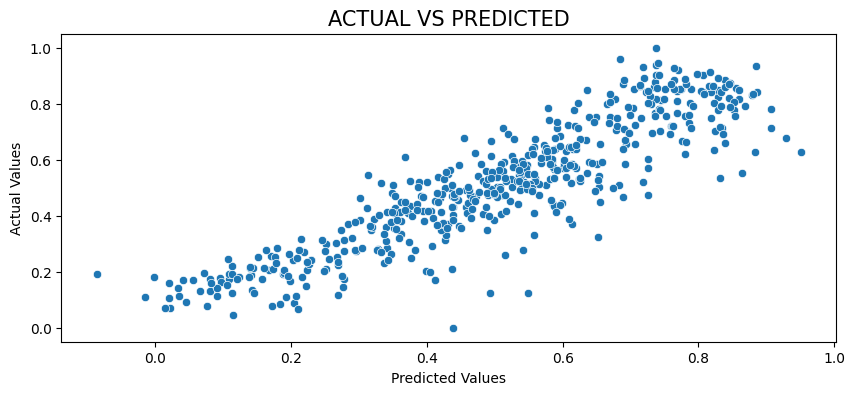

In [179]:
residuals=y_train-y_train_pred

plt.figure(figsize=(10,4))

sns.scatterplot(x=y_train_pred,y=y_train,palette='Purples')

plt.title('Actual vs Predicted'.upper(),fontsize=15, fontweight=20)
plt.xlabel('Predicted Values'.title(),fontsize=10)
plt.ylabel('Actual Values'.title(),fontsize=10)

plt.show()


/tmp/ipykernel_1066/2339935264.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_train_pred,y=residuals,palette='Purples')


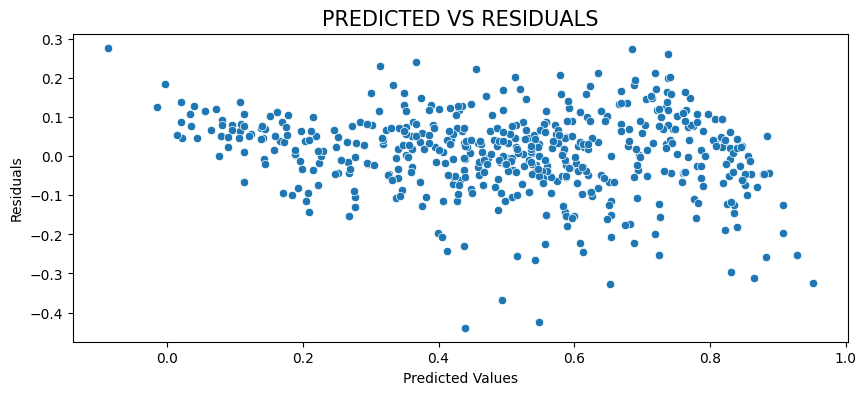

In [180]:
##  correlation between error terms
residuals=y_train-y_train_pred

plt.figure(figsize=(10,4))

sns.scatterplot(x=y_train_pred,y=residuals,palette='Purples')

plt.title('Predicted vs Residuals'.upper(),fontsize=15, fontweight=20)
plt.xlabel('Predicted Values'.title(),fontsize=10)
plt.ylabel('Residuals'.title(),fontsize=10)

plt.show()

## Making Prediction

In [181]:
bb_test.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
418,1,0,1,0.454167,0.444446,0.554583,0.190913,5062,1,0,...,0,0,0,0,0,1,0,0,0,0
723,1,0,1,0.231304,0.258900,0.791304,0.077230,920,1,0,...,0,0,1,0,0,0,0,0,0,1
648,1,0,1,0.514167,0.503142,0.630833,0.187821,7691,0,0,...,1,0,0,0,0,0,0,1,0,0
203,0,0,0,0.849167,0.804287,0.500000,0.131221,3285,0,0,...,0,0,0,1,0,0,0,0,0,0
272,0,0,1,0.564167,0.544829,0.647500,0.206475,5202,0,0,...,0,1,0,0,0,0,0,0,0,0


In [182]:
bb_test[scaler_list]=scaler.transform(bb_test[scaler_list])

In [183]:
bb_test.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
436,1,0,1,0.507811,0.499487,0.504079,0.355596,0.606995,1,0,...,0,0,1,0,0,0,0,0,0,0
418,1,0,1,0.492235,0.479606,0.571489,0.319480,0.579844,1,0,...,0,0,0,0,0,1,0,0,0,0
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,0,0,0,0,0,0,1,0,0,0
523,1,0,1,0.677065,0.643680,0.584370,0.247326,0.859641,0,1,...,0,0,0,0,0,1,0,0,0,0
169,0,0,0,0.797517,0.743971,0.686990,0.128334,0.543258,0,1,...,0,0,0,0,1,0,0,0,0,1


In [184]:
y_test=bb_test.pop('cnt')
X_test=bb_test

In [185]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.784017,0.755582,0.711035,0.227262,0,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [186]:
X_test_new=X_test[X_train_8.columns]

In [188]:
y_test_pred=lm.predict(X_test_new)

## Evaluating the Prediction

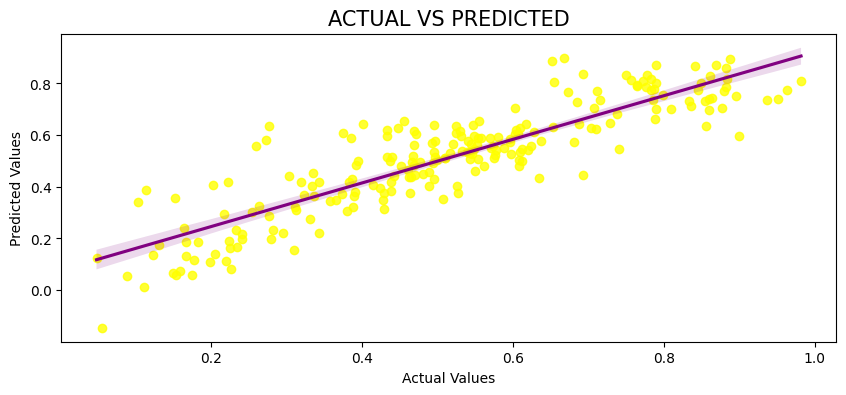

In [190]:
fig =plt.figure(figsize=(10,4))

sns.regplot(x=y_test,y=y_test_pred,scatter_kws={'color':'yellow'},line_kws={'color':'purple'})

plt.title('Actual vs Predicted'.upper(),fontsize=15, fontweight=20)
plt.xlabel('Actual Values'.title(),fontsize=10)
plt.ylabel('Predicted Values'.title(),fontsize=10)

plt.show()

## Assesing the Model Quality and generalization ability

In [191]:
#importing r2_score and mean_squared_error
from sklearn.metrics import r2_score,mean_squared_error

In [193]:
print(f'Our model has an R2 score of {round(lm.rsquared,2)}')
print(f'R2 score of test data is {round(r2_score(y_test,y_test_pred),2)}')
print(f'Mean Squared Error of test data is {round(mean_squared_error(y_test,y_test_pred),2)}')
print(f'R2 score of train data is {round(r2_score(y_train,y_train_pred),2)}')
print(f'Absolute difference between R2 score of train and test data is {round(abs(r2_score(y_train,y_train_pred)-r2_score(y_test,y_test_pred)),2)}')


Our model has an R2 score of 0.97
R2 score of test data is 0.77
Mean Squared Error of test data is 0.01
R2 score of train data is 0.79
Absolute difference between R2 score of train and test data is 0.02


## Equation of Prediction

In [194]:
const=0.308     ## taken from X_train_8

parameter_series=pd.Series(lm.params)
print(f'Our model has the following parameters\n{parameter_series}')


Our model has the following parameters
yr            0.245912
temp          0.739082
windspeed    -0.031796
Spring       -0.006585
Winter        0.131169
Jul          -0.111725
Light Snow   -0.267403
Mist         -0.055337
dtype: float64


In [196]:
print(f'Our model has the following constant:{round(const,3)}')

for i in range(len(parameter_series)):
    if i != len(parameter_series)-1:
        print(f'\t{parameter_series.index[i]}x{round(parameter_series.values[i],3)}+',end='')
    else:
        print(f'\t{parameter_series.index[i]}x{round(parameter_series.values[i],3)}+{round(const,3)}')

Our model has the following constant:0.308
	yrx0.246+	tempx0.739+	windspeedx-0.032+	Springx-0.007+	Winterx0.131+	Julx-0.112+	Light Snowx-0.267+	Mistx-0.055+0.308
